We will use Scikit learn library to classify digits using Logistic Regression.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn import metrics
import re
%matplotlib inline

## Loading Data

In [3]:
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [4]:
print("Feature Set Size:", digits.data.shape)
print("Label Set Size:", digits.target.shape)
type(digits.data)

Feature Set Size: (1797, 64)
Label Set Size: (1797,)


numpy.ndarray

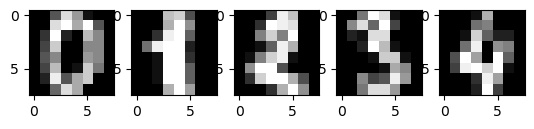

In [6]:
for index,(image,label) in enumerate (zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    #plt.title('Training Image: \n', index)

## Splitting Dataset
- as dataset is simple, we are not using Cross_validation Set

In [7]:
tr_x,te_x,tr_y,te_y = train_test_split(digits.data,digits.target, test_size=0.3, random_state=33)

In [8]:
for x in (digits.data,tr_x,te_x):
    print("Shape:",x.shape)

Shape: (1797, 64)
Shape: (1257, 64)
Shape: (540, 64)


## Creating a Logistic regression Model

In [9]:
lg = LogisticRegression(solver='lbfgs', max_iter=10000)
# Because of lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
lg.fit(tr_x,tr_y)

LogisticRegression(max_iter=10000)

## Evaluating Model

In [10]:
Predictions = lg.predict(te_x)

In [11]:
accuracy = lg.score(te_x,te_y)
print(accuracy)

0.9611111111111111


## visualization

In [12]:
index=0
correct = []
missed = []
for predict,actual in zip(Predictions,te_y):
    if predict==actual:
        correct.append(index)
    else:
        missed.append(index)
    index+=1

print("No. of missed predictions:", len(missed))

No. of missed predictions: 21


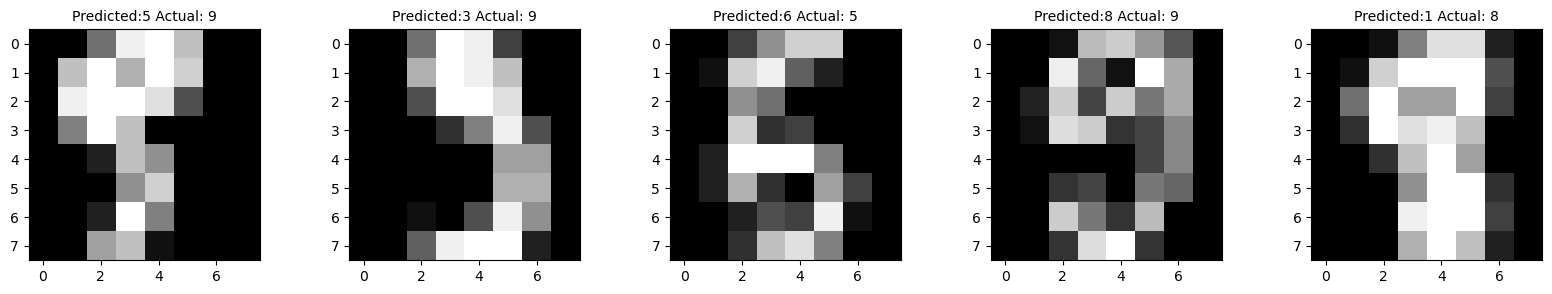

In [16]:
plt.figure(figsize=(20,3))
index=0
for index, wrong in enumerate(missed[0:5]):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(te_x[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted:{} Actual: {}".format(Predictions[wrong],te_y[wrong]), fontsize=10)